# Notebook imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Data Preprocessing

In [2]:
bike_data = pd.read_csv('daily-bike-share (1).csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)

# Feature Engineering

In [5]:
bike_data['difference_temp']= (bike_data['atemp']-bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
bike_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191


In [6]:
numeric_features = ['temp','hum','windspeed','difference_temp']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

# Modelling for one explanatory variable

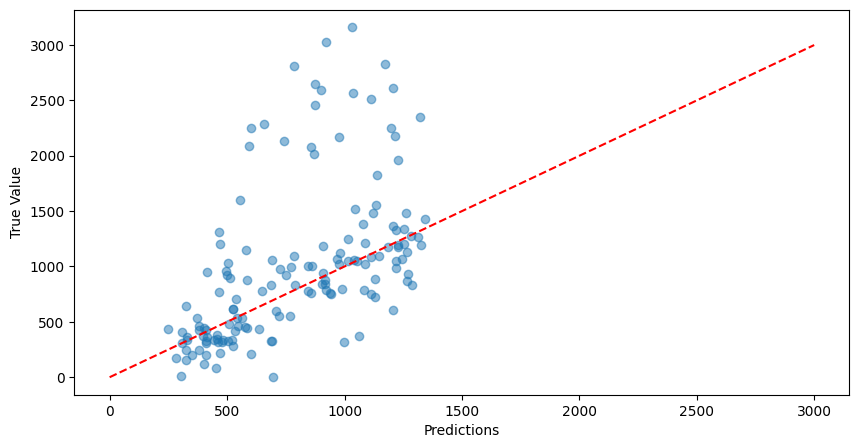

In [7]:
# Linear Regression model for one explanatory variable (temperature)

X = bike_data[['temp']].copy()
y = bike_data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 

y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(x=y_predict_test, y=y_test, alpha=0.5)
plt.plot(range(3000), ls='--', color='red')
plt.ylabel('True Value')
plt.xlabel('Predictions')
plt.show()

# Scaling for regression model with  L1  and L2 regularization

In [8]:
# division on explanatory variables and explained variable
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# division on trainig and test se
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# data transformation
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# ElasticNet Modelling

In [9]:
# creating pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

cv = KFold(n_splits=5, shuffle=False)


In [10]:
# fitting model to different metrics


# RMSE
print('\nRMSE')
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions_rmse = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions_rmse))}')


# MAPE
print('\nMAPE')
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_absolute_percentage_error',                                                
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)

print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions_mape = final_polynomial_regression_model.predict(X_test)
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions_mape)}')


# MAE
print('\nMAE')
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_absolute_error',                                                
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)

print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions_mae = final_polynomial_regression_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, predictions_mae)}')


RMSE

Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.93792481443705

MAPE

Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.9} 

MAPE: 0.8902002584101653

MAE

Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.0} 

MAE: 346.9773694743837


# Models visualistion

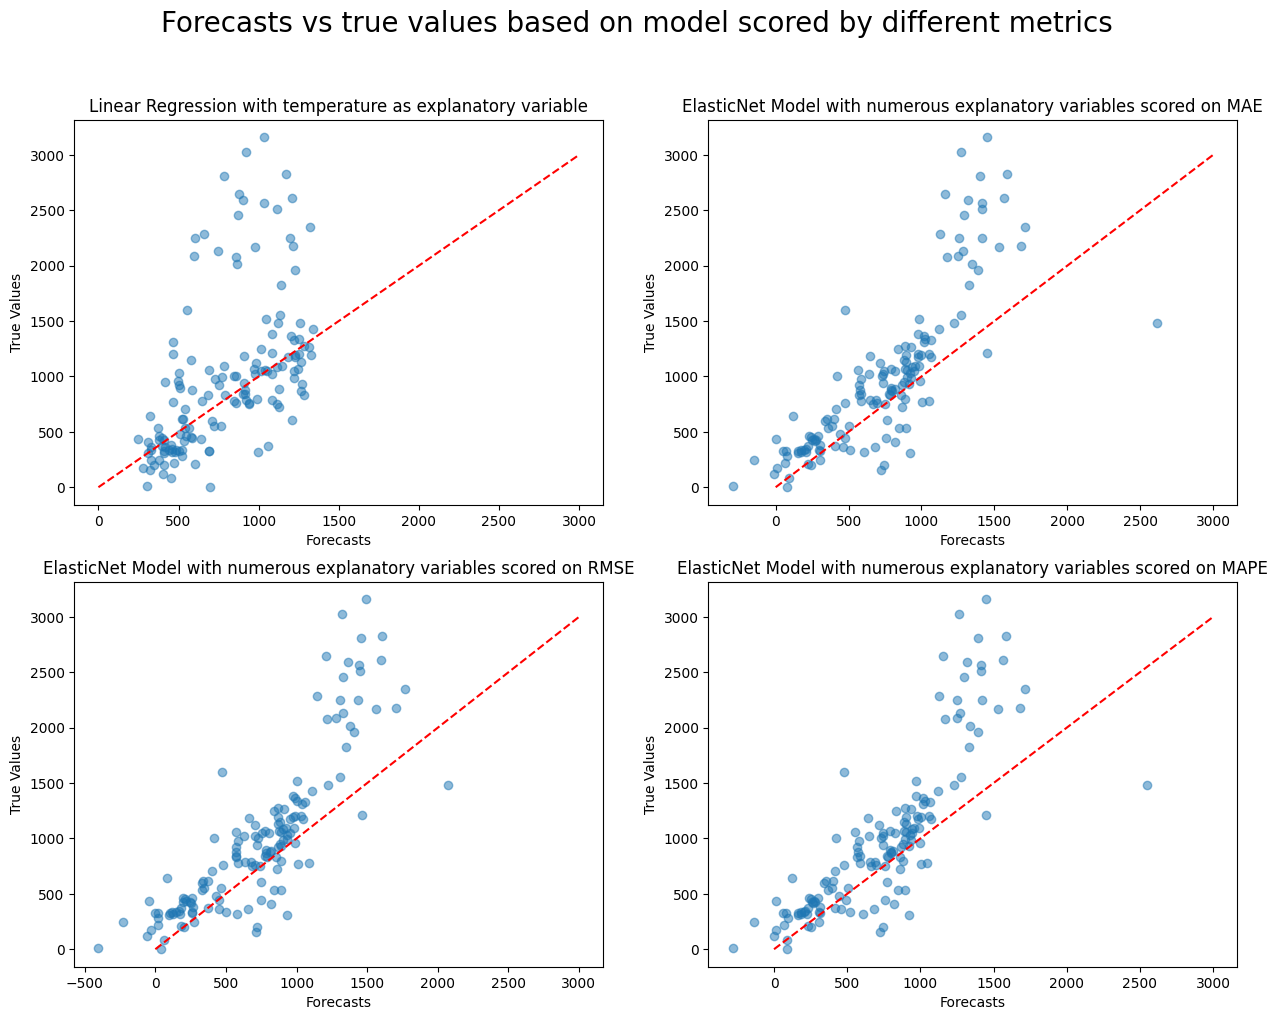

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 11))

fig.suptitle('Forecasts vs true values based on model scored by different metrics', size=20)

axs[0,0].scatter(x=y_predict_test, y=y_test, alpha=0.5)
axs[0,0].plot(range(3000), ls='--', color='red')
axs[0,0].set_title('Linear Regression with temperature as explanatory variable')

axs[0,1].scatter(x=predictions_mae, y=y_test, alpha=0.5)
axs[0,1].plot(range(3000), ls='--', color='red')
axs[0,1].set_title('ElasticNet Model with numerous explanatory variables scored on MAE')


axs[1,0].scatter(x=predictions_rmse, y=y_test, alpha=0.5)
axs[1,0].plot(range(3000), ls='--', color='red')
axs[1,0].set_title('ElasticNet Model with numerous explanatory variables scored on RMSE')

axs[1,1].scatter(x=predictions_mape, y=y_test, alpha=0.5)
axs[1,1].plot(range(3000), ls='--', color='red')
axs[1,1].set_title('ElasticNet Model with numerous explanatory variables scored on MAPE')

for ax in axs.flat:
    ax.set(xlabel='Forecasts', ylabel='True Values') 

plt.show()

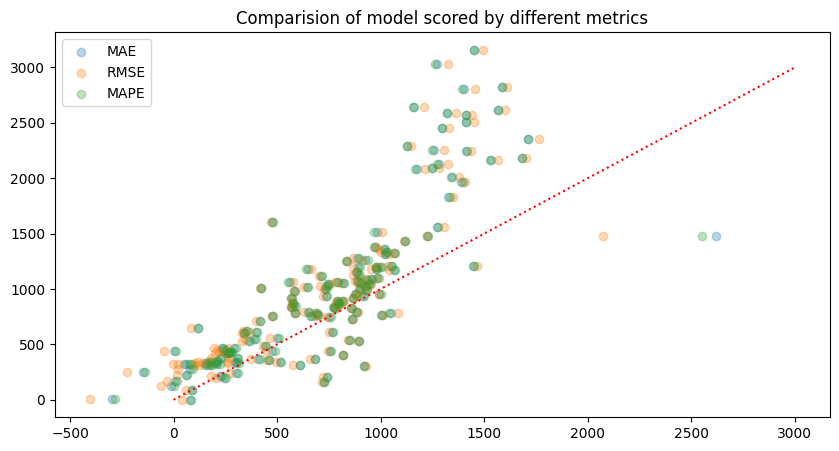

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Comparision of model scored by different metrics")
ax.scatter(x=predictions_mae, y=y_test, alpha=0.3, label="MAE")
ax.scatter(x=predictions_rmse, y=y_test, alpha=0.3, label='RMSE')
ax.scatter(x=predictions_mape, y=y_test, alpha=0.3, label='MAPE')
ax.plot(range(3000), ls='dotted', color='red')
ax.legend(loc='upper left')